In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [209]:
data = pd.read_csv(r"D:\Newset1.csv")
data

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,0,228.69,36.6,1,1
1,1,80,0,1,1,0,105.92,32.5,0,1
2,0,49,0,0,1,0,171.23,34.4,2,1
3,0,79,1,0,1,1,174.12,24.0,0,1
4,1,81,0,0,1,0,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...
1092,1,70,0,0,1,1,104.74,29.4,2,0
1093,0,53,0,0,1,1,89.59,22.1,2,0
1094,0,43,0,0,0,0,71.70,24.1,0,0
1095,1,51,0,0,1,0,96.34,30.3,1,0


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1097 non-null   int64  
 1   age                1097 non-null   int64  
 2   hypertension       1097 non-null   int64  
 3   heart_disease      1097 non-null   int64  
 4   ever_married       1097 non-null   int64  
 5   work_type          1097 non-null   int64  
 6   avg_glucose_level  1097 non-null   float64
 7   bmi                1097 non-null   float64
 8   smoking_status     1097 non-null   int64  
 9   stroke             1097 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 85.8 KB


In [87]:
data=data.drop(["id","gender","smoking_status","ever_married","Residence_type"], axis =1)
data

In [88]:
data.work_type.value_counts()

In [89]:
data = data.drop(['work_type'],axis=1)

In [95]:
data = data.dropna()

In [117]:
data

In [215]:
x= data.drop(['stroke'],axis=1)
y=data.stroke
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=2,stratify=y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(767, 7) (330, 7) (767,) (330,)


In [216]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)

C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

logistic regression accuracy :  0.7666666666666667


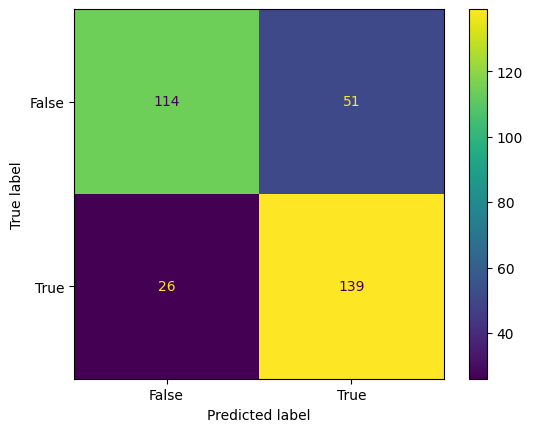

In [220]:
confusion_matrix = metrics.confusion_matrix(Y_train,trainPrediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()

In [205]:
testPrediction = model1.predict(X_test)
testPredictionAccuracy = metrics.accuracy_score(testPrediction,Y_test)
print("logistic regression accuracy : ",testPredictionAccuracy)

logistic regression accuracy :  0.7464788732394366


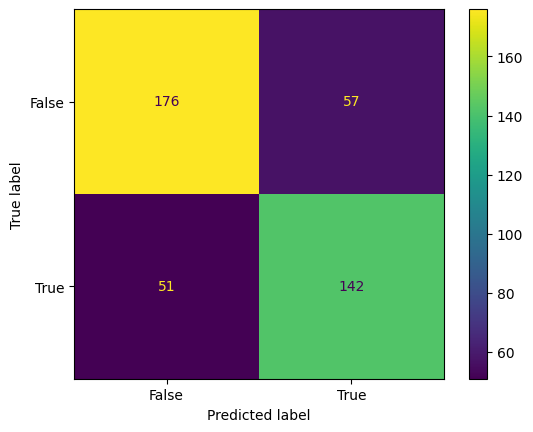

In [165]:
confusion_matrix = metrics.confusion_matrix(Y_test,testPrediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()

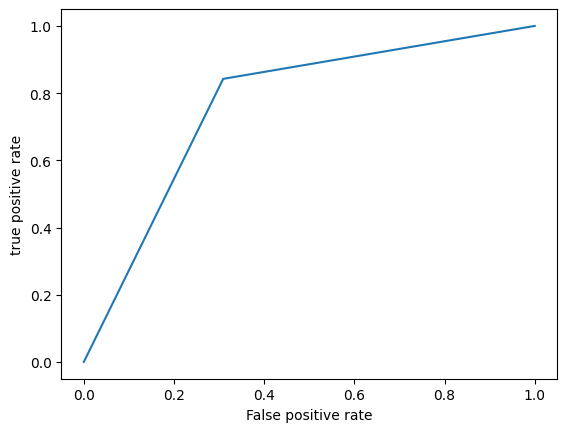

In [222]:
fpr, tpr, _ = metrics.roc_curve(Y_test, testPrediction)
plt.plot(fpr,tpr,label =" AUC = " +str(testPredictionAccuracy))
plt.ylabel('true positive rate')
plt.xlabel('False positive rate')
plt.show()

In [203]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)
input_data_np_array = np.array(input_data)
input_data_reshaped = input_data_np_array.reshape(1,-1)
prediction = model1.predict(input_data_reshaped)
print(prediction)

Unexpected exception formatting exception. Falling back to standard exception


C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
Traceback (most recent call last):
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Thanos\AppData\Local\Temp\ipykernel_27572\439805529.py", line 4, in <module>
    prediction = model1.predict(input_data_reshaped)
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py", line 419, in predict
    scores = self.decision_function(X)
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py", line 400, in decision_function
    X = self._validate_data(X, accept_sparse="csr", reset=False)
  File "C:\Users\Thanos\AppDa

In [223]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train,Y_train)

RandomForestClassifier()

In [224]:
testPrediction2 = model2.predict(X_test)
testPredictionAccuracy2 = metrics.accuracy_score(testPrediction2,Y_test)
print("Random forest classifier accuracy : ",testPredictionAccuracy2)

Random forest classifier accuracy :  0.7272727272727273


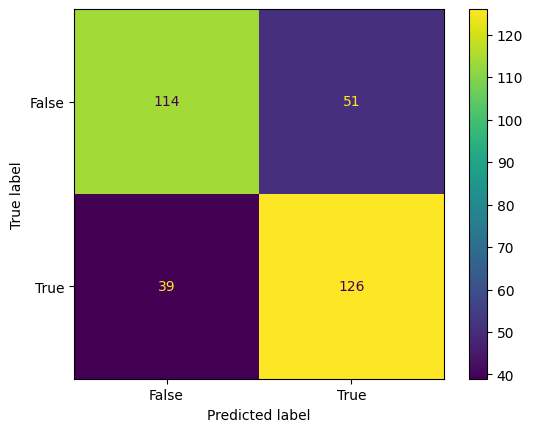

In [225]:
confusion_matrix = metrics.confusion_matrix(Y_test,testPrediction2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()

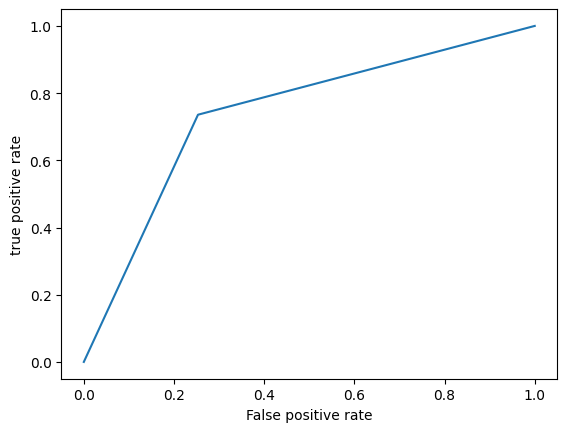

In [170]:
fpr, tpr, _ = metrics.roc_curve(Y_test, testPrediction2)
plt.plot(fpr,tpr,label =" AUC = " +str(testPredictionAccuracy2))
plt.ylabel('true positive rate')
plt.xlabel('False positive rate')
plt.show()

In [171]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train,Y_train)

DecisionTreeClassifier()

In [172]:
testPrediction3 = model3.predict(X_test)
testPredictionAccuracy3 = metrics.accuracy_score(testPrediction3,Y_test)
print("decision Tree classifier accuracy : ",testPredictionAccuracy3)

decision Tree classifier accuracy :  0.6596244131455399


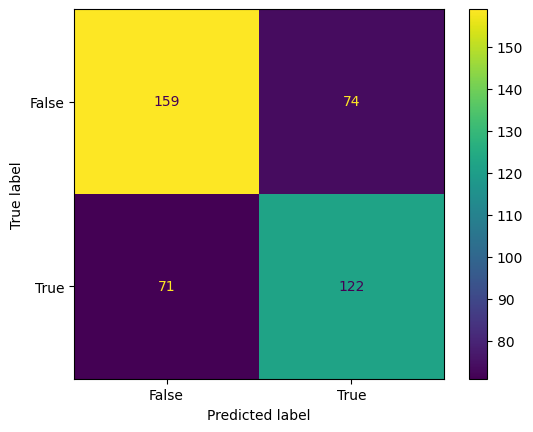

In [173]:
confusion_matrix = metrics.confusion_matrix(Y_test,testPrediction3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()

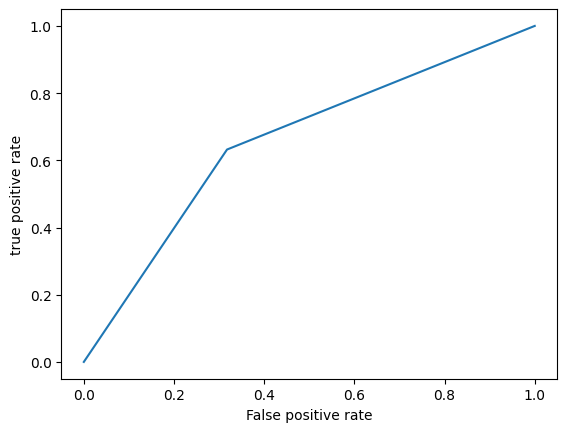

In [174]:
fpr, tpr, _ = metrics.roc_curve(Y_test, testPrediction3)
plt.plot(fpr,tpr,label =" AUC = " +str(testPredictionAccuracy3))
plt.ylabel('true positive rate')
plt.xlabel('False positive rate')
plt.show()

In [175]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train,Y_train)

GaussianNB()

In [176]:
testPrediction4 = model4.predict(X_test)
testPredictionAccuracy4 = metrics.accuracy_score(testPrediction4,Y_test)
print("decision Tree classifier accuracy : ",testPredictionAccuracy4)

decision Tree classifier accuracy :  0.704225352112676


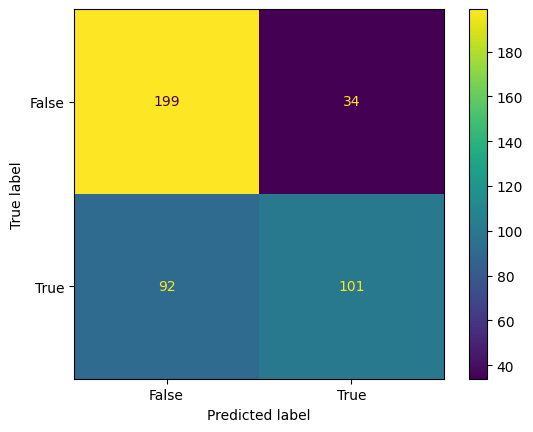

In [177]:
confusion_matrix = metrics.confusion_matrix(Y_test,testPrediction4)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()

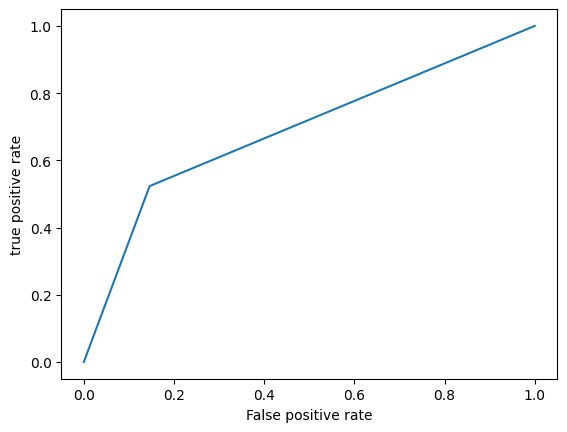

In [178]:
fpr, tpr, _ = metrics.roc_curve(Y_test, testPrediction4)
plt.plot(fpr,tpr,label =" AUC = " +str(testPredictionAccuracy4))
plt.ylabel('true positive rate')
plt.xlabel('False positive rate')
plt.show()

In [179]:
from sklearn.ensemble import BaggingClassifier
model5 = BaggingClassifier()
model5.fit(X_train,Y_train)

BaggingClassifier()

In [180]:
testPrediction5 = model5.predict(X_test)
testPredictionAccuracy5 = metrics.accuracy_score(testPrediction5,Y_test)
print("bagging accuracy : ", testPredictionAccuracy5)

bagging accuracy :  0.7112676056338029
